Задание
Основные цели этого задания:

Научиться понижать размерность данных

Попрактиковаться в обучении моделей кластеризации

Задача: по замерам акселерометра и гироскопа, произведенным с помощью телефона, находящегося на поясе, научиться отделять различные типы активностей друг от друга.

План решения:
1. Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy.

In [31]:
from sklearn.ensemble import IsolationForest 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import VarianceThreshold

from pyod.models.knn import KNN 

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

sns.set()

In [32]:
# Укажите путь к файлу
file_path = 'M:/1 T  обучалово/HomeWork/2.6/UCI HAR Dataset/train/X_train.txt'

# Загрузка данных из файла
data = np.loadtxt(file_path)
df = pd.DataFrame(data)
# Вывод первых 5 строк загруженных данных
df.head().T

,0,1,2,3,4
0,0.288585,0.278419,0.279653,0.279174,0.276629
1,-0.020294,-0.016411,-0.019467,-0.026201,-0.016570
2,-0.132905,-0.123520,-0.113462,-0.123283,-0.115362
3,-0.995279,-0.998245,-0.995380,-0.996091,-0.998139
4,-0.983111,-0.975300,-0.967187,-0.983403,-0.980817
...,...,...,...,...,...
556,-0.464761,-0.732626,0.100699,0.640011,0.693578
557,-0.018446,0.703511,0.808529,-0.485366,-0.615971
558,-0.841247,-0.844788,-0.848933,-0.848649,-0.847865
559,0.179941,0.180289,0.180637,0.181935,0.185151


2. Ознакомьтесь с данными:

2.1 выведите количество признаков;

2.2 есть ли в данных пропуски;

2.3 отличаются ли различные признаки по масштабу.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [34]:
df.isna().sum().sum()

0

In [35]:
descr = df.describe().T
descr

,count,mean,std,min,25%,50%,75%,max
0,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
1,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
2,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
3,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
4,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
556,7352.0,0.008726,0.608303,-1.000000,-0.482273,0.008735,0.506187,0.998702
557,7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
558,7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
559,7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157


In [36]:
print(descr['mean'].mean())
print(descr['50%'].mean())
print(descr['std'].mean())

-0.508365037734111
-0.6131463817509625
0.2836933644890431


## Вывод:

- В датасете 561 признак.
- По масштабу признаки не сбалансированы.
- Пропуски отсутствуют.


  3. Понизьте размерность данных:

3.1 воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;


In [37]:
df.shape

(7352, 561)

In [38]:
var = VarianceThreshold(threshold=0.01)
df_th = pd.DataFrame(var.fit_transform(df), columns=df.columns[var.get_support()])

df_th.shape

(7352, 524)

In [39]:
df_th.head()

,3,4,5,6,7,8,9,10,11,12,...,551,552,553,554,555,556,557,558,559,560
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


3.2 воспользуйтесь методом PCA:
3.2.1 приведите признаки к одинаковому масштабу,

3.2.2 визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,

3.2.3 определите минимальное необходимое количество главных компонент,  при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),

.3.3.3 выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

In [40]:
df_norm = StandardScaler().fit_transform(df_th.values)

In [41]:
sum([df_norm[:, i].var() for i in range(524)])

524.0

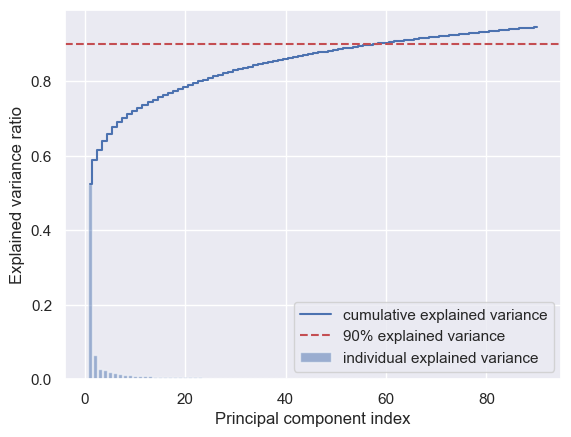

In [42]:
pca = PCA(n_components = 90)
pca.fit(df_norm)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 91), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 91), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [43]:
# 4. Определение необходимого количества главных компонент для 90% дисперсии
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance >= 0.9) + 1
print(f'Необходимое количество главных компонент для объяснения дисперсии не менее 90%: {n_components_90}')

Необходимое количество главных компонент для объяснения дисперсии не менее 90%: 59


In [44]:
# # 5. Выделение первых двух главных компонент
pca = PCA(n_components = 2)
df_reduced = pca.fit_transform(df_norm)

In [45]:
pd.DataFrame(df_norm).corr()

,0,1,2,3,4,5,6,7,8,9,...,514,515,516,517,518,519,520,521,522,523
0,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,0.895217,0.844993,-0.966500,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
1,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,0.953573,0.884490,-0.937918,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
2,0.851668,0.895510,1.000000,0.844469,0.891441,0.997418,0.853884,0.866820,0.937802,-0.860691,...,-0.097978,0.157792,0.126701,-0.006769,-0.020036,-0.018429,-0.006471,-0.345011,0.476006,0.482828
3,0.998632,0.922803,0.844469,1.000000,0.916106,0.839267,0.973216,0.889934,0.838920,-0.962235,...,-0.059972,0.149257,0.117804,-0.042713,-0.021537,0.019389,-0.024951,-0.368191,0.466424,0.390922
4,0.920888,0.997347,0.891441,0.916106,1.000000,0.891178,0.910411,0.949550,0.879898,-0.933135,...,-0.102908,0.200890,0.172809,-0.023722,-0.012310,-0.012546,-0.012341,-0.377025,0.525081,0.431459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,-0.007806,-0.028210,-0.002334,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
520,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,-0.000297,-0.001207,0.017876,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
521,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,-0.372172,-0.346824,0.362847,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
522,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,0.490324,0.463763,-0.470812,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


In [46]:
pd.DataFrame(df_reduced).corr()

,0,1
0,1.000000e+00,-7.160137e-17
1,-7.160137e-17,1.000000e+00


In [47]:
pd.DataFrame(pca.components_, columns=df_th.columns)

,3,4,5,6,7,8,9,10,11,12,...,551,552,553,554,555,556,557,558,559,560
0,0.057509,0.058187,0.055658,0.057248,0.057662,0.055207,0.057217,0.05606,0.054472,-0.057566,...,-0.005868,0.012672,0.010499,-0.001638,-0.001209,0.000939,-0.001566,-0.023796,0.030631,0.027379
1,-0.006461,-0.021852,-0.029867,-0.005061,-0.024713,-0.034020,-0.006408,-0.02253,-0.024020,0.007070,...,0.073965,-0.016744,-0.012233,-0.006055,-0.003815,0.012283,-0.009325,0.017783,-0.036061,-0.017498


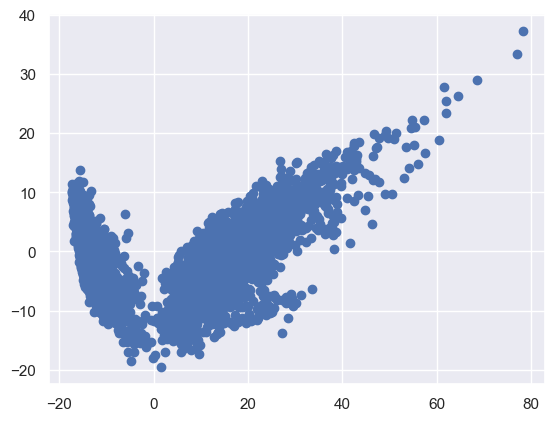

In [48]:
plt.scatter(df_reduced[:, 0], df_reduced[:, 1])

4. Подберите оптимальное число кластеров: 

4.1 воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;

4.2 выберите оптимальное количество кластеров и объясните свой выбор;

4.3 повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

In [49]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4)
    model.fit(df_reduced)
    distortion.append(model.inertia_) 

100%|██████████| 9/9 [00:00<00:00, 123.39it/s]


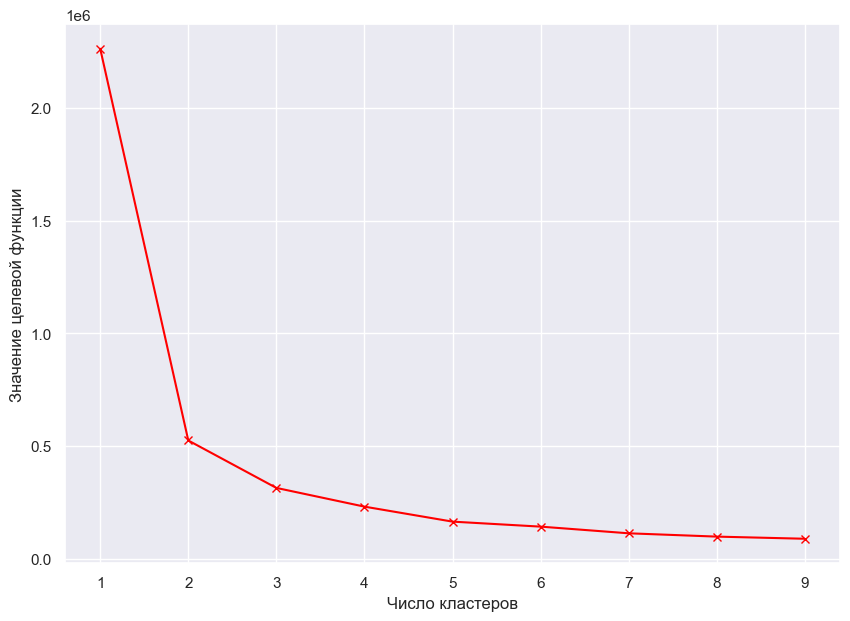

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(K, distortion, c='red', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

Оптимальное количество кластеров 2

In [51]:
# Обучение модели
model = KMeans(2, random_state=12)
clusters  = model.fit_predict(df_reduced)

print("Центроиды кластеров:")
print(model.cluster_centers_)

Центроиды кластеров:
[[ 17.05958149  -0.9768291 ]
 [-13.81733705   0.79117867]]


<Axes: xlabel='f1', ylabel='f2'>

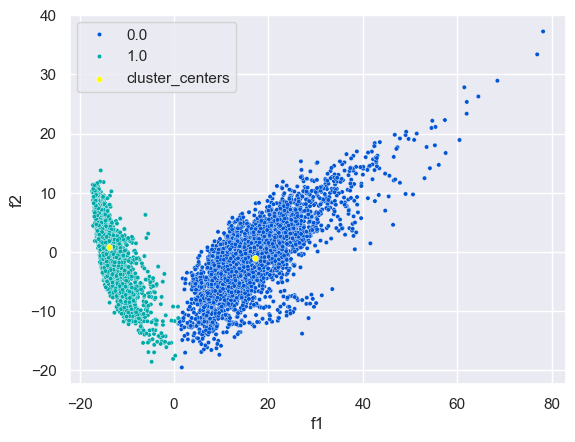

In [52]:
# разметка моделью
sns.scatterplot(
    data=pd.DataFrame(np.hstack([df_reduced, np.array([model.labels_]).T]), columns=['f1', 'f2', 'label']), 
    x='f1',
    y='f2',
    hue='label', 
    palette='winter',
    s=10
)
sns.scatterplot(
    pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2']), 
    color='yellow', 
    x='f1',
    y='f2',
    s=20,
    label='cluster_centers'
)

5. Оцените качество кластеризации:

5.1 подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;

5.2 определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;

5.2 сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [53]:
# оценка качества модели
print("Целевая функция:")
print(model.inertia_)

Целевая функция:
524597.8222060057


In [54]:
file_path = 'M:/1 T  обучалово/HomeWork/2.6/UCI HAR Dataset/train/y_train.txt'
data = np.loadtxt(file_path)
df_y = pd.DataFrame(data)
df_y.head().T

,0,1,2,3,4
0,5.0,5.0,5.0,5.0,5.0


In [55]:
y_names = pd.read_csv('M:/1 T  обучалово/HomeWork/2.6/UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True)
target_dict = dict(zip(y_names[0], y_names[1]))
target_labels = df_y.replace(target_dict)
target_labels.sample(7)

C:\Users\gavri\AppData\Local\Temp\ipykernel_21772\2913388928.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_names = pd.read_csv('M:/1 T  обучалово/HomeWork/2.6/UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True)


,0
2584,SITTING
389,SITTING
3383,WALKING_DOWNSTAIRS
1694,WALKING
3772,WALKING_UPSTAIRS
621,WALKING
4015,SITTING


In [56]:
contingency_table = pd.crosstab(target_labels[0], clusters.tolist(),
                                rownames=['Реальные метки'], colnames=['Кластеры'])
print(contingency_table)

Кластеры               0     1
Реальные метки                
LAYING                11  1396
SITTING                1  1285
STANDING               0  1374
WALKING             1226     0
WALKING_DOWNSTAIRS   986     0
WALKING_UPSTAIRS    1066     7


### Вывод:

Результаты сводной таблицы указывают на то, что несколько активностей сгруппировались в один кластер из-за схожих характеристик. Например, "LAYING", "SITTING" и "STANDING" описывают статичные позиции, в то время как "WALKING", "WALKING_DOWNSTAIRS" и "WALKING_UPSTAIRS" относятся к движениям. Такая кластеризация логична и отражает сходство в поведении человека при выполнении этих действий.